# _Fashion Deep Learning Recommendation Systems_

_Download the Dataset from here <a href=https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small>Dataset</a>
All the code is given. You need to download the data and train the model using the following code and save the model. Then, create a streamlit app to recommend similar products._

In [1]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [2]:
#Extract Filenames from Folder

In [3]:
filenames = [
    os.path.join("images", f)
    for f in os.listdir("images")
    if f.lower().endswith((".jpg", ".png", ".jpeg"))
]

In [4]:
len(filenames)

44441

In [5]:
#Importing ResNet50 Model and Cofiguration

In [6]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [7]:
#Extracting Fetaures from Image

In [8]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess, verbose=0).flatten()
    norm_result = result / (norm(result) + 1e-10)
    return norm_result

In [9]:
extract_features_from_images(filenames[0], model)

array([0.        , 0.01761626, 0.00171601, ..., 0.01247231, 0.02726392,
       0.06899252], dtype=float32)

In [10]:
image_features = []
for file in filenames[0:500]:
    image_features.append(extract_features_from_images(file, model))
image_features

[array([0.        , 0.01761626, 0.00171601, ..., 0.01247231, 0.02726392,
        0.06899252], dtype=float32),
 array([0.        , 0.03648945, 0.        , ..., 0.00997932, 0.02375533,
        0.04649903], dtype=float32),
 array([0.        , 0.0364214 , 0.00710437, ..., 0.00140778, 0.        ,
        0.05435034], dtype=float32),
 array([0.00232171, 0.05030547, 0.00747744, ..., 0.00346683, 0.03391017,
        0.04565724], dtype=float32),
 array([0.00306835, 0.06240456, 0.        , ..., 0.00170627, 0.0203289 ,
        0.05833261], dtype=float32),
 array([0.        , 0.10469136, 0.00198095, ..., 0.        , 0.03033751,
        0.02712858], dtype=float32),
 array([0.        , 0.12438442, 0.01465611, ..., 0.00289709, 0.04055162,
        0.06534588], dtype=float32),
 array([0.        , 0.09169213, 0.01569912, ..., 0.        , 0.00503583,
        0.04560041], dtype=float32),
 array([0.        , 0.09545278, 0.01153319, ..., 0.0007301 , 0.04513261,
        0.07661065], dtype=float32),
 array([0.

In [11]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [12]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [13]:
#Loading Pickle Files

In [14]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [15]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [16]:
np.array(Image_features).shape

(500, 2048)

In [17]:
#Finidng Simialar Images

In [18]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [19]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [20]:
input_image = extract_features_from_images('images/16871.jpg',model)

In [21]:
distance,indices = neighbors.kneighbors([input_image])

In [22]:
indices[0]

array([195, 194, 215, 297, 139, 258])

In [23]:
from IPython.display import Image

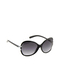

In [24]:
Image('images/16871.jpg')

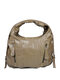

In [25]:
Image(filenames[indices[0][1]])

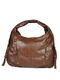

In [26]:
Image(filenames[indices[0][2]])

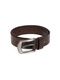

In [27]:
Image(filenames[indices[0][3]])

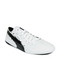

In [28]:
Image(filenames[indices[0][4]])

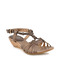

In [29]:
Image(filenames[indices[0][5]])

_Create a streamlit app using this trained model and when I pick one item, it should recommend similar items using  NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')_